In [1]:
import cantools
import random
import struct
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
import time

In [1]:
from flask_socketio import SocketIO, emit

In [2]:
# Load the DBC file
dbc_file = 'demo3.dbc'
db = cantools.database.load_file(dbc_file)

In [2]:
# Define a function to decode CAN data using the loaded DBC file

def decode_can_data(can_id, raw_data):
    can_id_int = int(can_id, 16)
    message = db.get_message_by_frame_id(can_id_int)

    raw_data_bytes = bytes.fromhex(raw_data.replace(' ', ''))
    # Print raw data for debugging
    print(f"Decoding CAN ID: {can_id} (int: {can_id_int})")
    print(f"Raw data bytes: {raw_data_bytes.hex().upper()}")

    # Decode the raw data using the message format
    try:
        decoded_data = message.decode(raw_data_bytes)
        
        # Print decoded data for debugging
        print(f"Decoded data: {decoded_data}")
        return decoded_data
    
    except Exception as e:
        print(f"Decoding error: {e}")
        return None


In [4]:
can_id = '0x200'
raw_data = 'C7 51 3C F1 48 00 00 00 00'
decoded = decode_can_data(can_id, raw_data)
print(decoded)

Decoding CAN ID: 0x200 (int: 512)
Raw data bytes: C7513CF14800000000
Decoded data: {'BatteryVoltage': 2093.5, 'BatteryCurrent': 6175.6, 'StateOfCharge': 28.8}
{'BatteryVoltage': 2093.5, 'BatteryCurrent': 6175.6, 'StateOfCharge': 28.8}


In [5]:
can_id = '0x300'
raw_data = 'AC 93 00 00 00 00 00 00'
decoded = decode_can_data(can_id, raw_data)
print(decoded)

Decoding CAN ID: 0x300 (int: 768)
Raw data bytes: AC93000000000000
Decoded data: {'VehicleSpeed': 0.57421875}
{'VehicleSpeed': 0.57421875}


In [6]:
# Example usage:
# Assuming 'db' is defined and configured correctly
# CAN ID: 0x100
# Raw data: '6C 34 00 00 00 00 04 00 00'

can_id = '0x100'
raw_data = '00 00 00 0F 78 00 0A 70 00'
decoded = decode_can_data(can_id, raw_data)
print(decoded)

Decoding CAN ID: 0x100 (int: 256)
Raw data bytes: 0000000F78000A7000
Decoded data: {'MotorSpeed': 0.0, 'MotorTemperature': 3840}
{'MotorSpeed': 0.0, 'MotorTemperature': 3840}


Let's decode the CAN data using the provided function and the given raw data. To do this, we'll need to understand the structure of the CAN message and how the decoding function works. 

The provided raw data is:

```
CAN ID: 0x100
Raw data: 6C 34 00 00 00 00 04 00 00
```

The decoding function `decode_can_data` takes a CAN ID and the raw data string, converts the CAN ID to an integer, and then uses a database (`db`) to get the corresponding message format. It then decodes the raw data bytes according to the message format and prints the decoded values.

Let's assume the database (`db`) has a message corresponding to CAN ID 0x100. Here is how the decoding function would process the raw data:

1. **Convert CAN ID to Integer:**
   ```python
   can_id_int = int(can_id, 16)  # Converts '0x100' to 256
   ```

2. **Fetch Message Format:**
   ```python
   message = db.get_message_by_frame_id(can_id_int)  # Fetches message format for CAN ID 256
   ```

3. **Convert Raw Data String to Bytes:**
   ```python
   raw_data_bytes = bytes.fromhex(raw_data.replace(' ', ''))  # Converts '6C 34 00 00 00 00 04 00 00' to bytes
   ```

   The raw data string `6C 34 00 00 00 00 04 00 00` in bytes would be:
   ```python
   raw_data_bytes = b'\x6C\x34\x00\x00\x00\x00\x04\x00\x00'
   ```

4. **Decode Raw Data:**
   ```python
   decoded_data = message.decode(raw_data_bytes)
   ```

For the given raw data `6C 34 00 00 00 00 04 00 00` and assuming the message structure is as defined earlier:

```python
motor_data = struct.pack('<HxxxxBxx', motor_speed, motor_temperature)
```

Here is how the decoding would map the bytes:

- `motor_speed` is represented by the first 2 bytes (`6C 34`).
- The next 4 bytes are padding and ignored (`00 00 00 00`).
- `motor_temperature` is represented by the 7th byte (`04`).

Let's decode these values manually:

### Decoding `motor_speed`:
The first two bytes are `6C 34`:

```python
motor_speed = int.from_bytes(b'\x6C\x34', byteorder='little')
# motor_speed = 0x346C = 13420 (in decimal)
```

### Decoding `motor_temperature`:
The 7th byte is `04`:

```python
motor_temperature = int.from_bytes(b'\x04', byteorder='little')
# motor_temperature = 0x04 = 4 (in decimal)
```

So the decoded values are:

- `motor_speed`: 13420
- `motor_temperature`: 4

### Full Decoding Example
Using the `decode_can_data` function, the print statements would display:

```python
Decoding CAN ID: 0x100 (int: 256)
Raw data bytes: 6C3400000000040000
Decoded data: {'motor_speed': 13420, 'motor_temperature': 4}
```

Thus, the function will return a dictionary with the decoded values:

```python
{'motor_speed': 13420, 'motor_temperature': 4}
```

This represents the decoded motor speed and temperature from the given CAN data.

In [9]:
import random
import struct

def generate_raw_can_data():
    # Generate raw data for MotorController1 (ID: 0x1810A7F3)
    motor_speed = int(random.uniform(0, 10000) / 0.1)  # MotorSpeed: 0|16@1+ (0.1,0)
    motor_speed = max(0, min(motor_speed, 65535))
    
    motor_torque = int(random.uniform(0, 500) / 0.1)  # MotorTorque: 16|16@1+ (0.1,0)
    motor_torque = max(0, min(motor_torque, 65535))
    
    motor_temperature = int(random.uniform(-40, 210))  # MotorTemperature: 32|16@1+ (1,0)
    motor_temperature = max(0, min(motor_temperature, 65535))
    
    motor_controller1_data = struct.pack('<HHHxx', motor_speed, motor_torque, motor_temperature)

    # Generate raw data for MotorController2 (ID: 0x1818A7F3)
    motor_speed2 = int(random.uniform(0, 10000) / 0.1)  # MotorSpeed2: 0|16@1+ (0.1,0)
    motor_speed2 = max(0, min(motor_speed2, 65535))
    
    motor_torque2 = int(random.uniform(0, 500) / 0.1)  # MotorTorque2: 16|16@1+ (0.1,0)
    motor_torque2 = max(0, min(motor_torque2, 65535))
    
    inverter_temperature = int(random.uniform(-40, 210))  # InverterTemperature: 32|16@1+ (1,0)
    inverter_temperature = max(0, min(inverter_temperature, 65535))
    
    motor_controller2_data = struct.pack('<HHHxx', motor_speed2, motor_torque2, inverter_temperature)

    # Generate raw data for BatteryManagement1 (ID: 0x1801F3A7)
    battery_voltage = int(random.uniform(0, 6553.5) / 0.1)  # BatteryVoltage: 0|16@1+ (0.1,0)
    battery_voltage = max(0, min(battery_voltage, 65535))
    
    battery_current = int(random.uniform(-3276.8, 3276.7) / 0.1)  # BatteryCurrent: 16|16@1+ (0.1,0)
    battery_current = max(-32768, min(battery_current, 32767))
    
    state_of_charge = int(random.uniform(0, 100) / 0.4)  # StateOfCharge: 32|8@1+ (0.4,0)
    state_of_charge = max(0, min(state_of_charge, 255))
    
    battery_temperature = int(random.uniform(-40, 100))  # BatteryTemperature: 40|16@1+ (1,0)
    battery_temperature = max(0, min(battery_temperature, 65535))
    
    battery_management1_data = struct.pack('<HhBHxx', battery_voltage, battery_current, state_of_charge, battery_temperature)

    # Generate raw data for VehicleStatus1 (ID: 0x18500627)
    vehicle_speed = int(random.uniform(0, 250.996) / 0.00390625)  # VehicleSpeed: 8|16@1+ (0.00390625,0)
    vehicle_speed = max(0, min(vehicle_speed, 65535))
    
    odometer = int(random.uniform(0, 4294967295))  # Odometer: 24|32@1+ (1,0)
    tire_pressure_fl = int(random.uniform(0, 100) / 0.1)  # TirePressureFL: 0|8@1+ (0.1,0)
    tire_pressure_fl = max(0, min(tire_pressure_fl, 255))  # Ensure the value is between 0 and 255
    
    tire_pressure_fr = int(random.uniform(0, 100) / 0.1)  # TirePressureFR: 8|8@1+ (0.1,0)
    tire_pressure_fr = max(0, min(tire_pressure_fr, 255))  # Ensure the value is between 0 and 255
    
    vehicle_status1_data = struct.pack('<BHHIB', tire_pressure_fl, tire_pressure_fr, vehicle_speed, odometer, 0x00)

    # Generate raw data for BatteryManagement2 (ID: 0x18FF0527)
    battery_voltage2 = int(random.uniform(0, 6553.5) / 0.1)  # BatteryVoltage2: 0|16@1+ (0.1,0)
    battery_voltage2 = max(0, min(battery_voltage2, 65535))
    
    battery_current2 = int(random.uniform(-3276.8, 3276.7) / 0.1)  # BatteryCurrent2: 16|16@1+ (0.1,0)
    battery_current2 = max(-32768, min(battery_current2, 32767))
    
    battery_management2_data = struct.pack('<Hhxxxx', battery_voltage2, battery_current2)

    # Generate raw data for BatteryManagement3 (ID: 0x18FF0927)
    state_of_charge2 = int(random.uniform(0, 100) / 0.4)  # StateOfCharge2: 32|8@1+ (0.4,0)
    state_of_charge2 = max(0, min(state_of_charge2, 255))
    
    battery_temperature2 = int(random.uniform(-40, 100))  # BatteryTemperature2: 40|16@1+ (1,0)
    battery_temperature2 = max(0, min(battery_temperature2, 65535))
    
    battery_management3_data = struct.pack('<BHHxx', state_of_charge2, battery_temperature2, 0x00)

    # Prepare CAN data dictionary
    can_data = {
        '1810A7F3': motor_controller1_data,
        '1818A7F3': motor_controller2_data,
        '1801F3A7': battery_management1_data,
        '18500627': vehicle_status1_data,
        '18FF0527': battery_management2_data,
        '18FF0927': battery_management3_data,
    }

    # Format the output as messageID#message
    formatted_can_data = {}
    for can_id, data in can_data.items():
        # Convert byte data to hex string and format as 'messageID#message'
        formatted_message = ''.join(['{:02X}'.format(b) for b in data])
        formatted_can_data[can_id] = f'{can_id}#{formatted_message}'

    # Print the formatted CAN data
    #print("Generated CAN data (messageID#message):")
    for can_id, message in formatted_can_data.items():
        print(message)

    return #formatted_can_data


In [10]:
# Example call to generate the data
generate_raw_can_data()

1810A7F3#31A9CE1214000000
1818A7F3#1DFF240000000000
1801F3A7#C2842C63B109000000
18500627#FF5300A154E1391E0E00
18FF0527#D424160700000000
18FF0927#5F340000000000


In [8]:
# Initialize lists for real-time data
motor_speed = []
motor_temp = []
battery_voltage = []
battery_current = []
soc = []
vehicle_speed = []

: 

Generated CAN data:
0x100: FF FF 3F 00 00 00 00 00
0x200: 8B E9 7F 12 CE 00 00 00 00
0x300: F4 AD 00 00 00 00 00 00
Decoding CAN ID: 0x100 (int: 256)
Raw data bytes: FFFF3F0000000000
Decoded data: {'MotorSpeed': 6553.5, 'MotorTemperature': 63}
Decoding CAN ID: 0x200 (int: 512)
Raw data bytes: 8BE97F12CE00000000
Decoded data: {'BatteryVoltage': 5978.700000000001, 'BatteryCurrent': 473.5, 'StateOfCharge': 82.4}
Decoding CAN ID: 0x300 (int: 768)
Raw data bytes: F4AD000000000000
Decoded data: {'VehicleSpeed': 0.67578125}
MotorSpeed: [2971.1000000000004, 5495.6, 4615.2, 4903.900000000001, 4692.1, 4749.6, 4089.5, 3346.5, 4661.900000000001, 2336.8, 6333.1, 6553.5, 6553.5, 781.8000000000001, 3117.7000000000003, 4406.7, 246.4, 4492.7, 6553.5, 326.8, 4362.8, 1380.2, 6553.5, 3682.4, 1143.1000000000001, 1142.3, 6336.1, 6553.5, 4265.1, 6294.200000000001, 2152.2000000000003, 1198.0, 5003.700000000001, 3394.3, 6553.5, 4378.5, 907.5, 6553.5, 6553.5] rpm, MotorTemperature: [181, 0, 178, 115, 0, 19, 181

c:\Users\ag928515.ttl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ag928515.ttl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ag928515.ttl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ag928515.ttl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

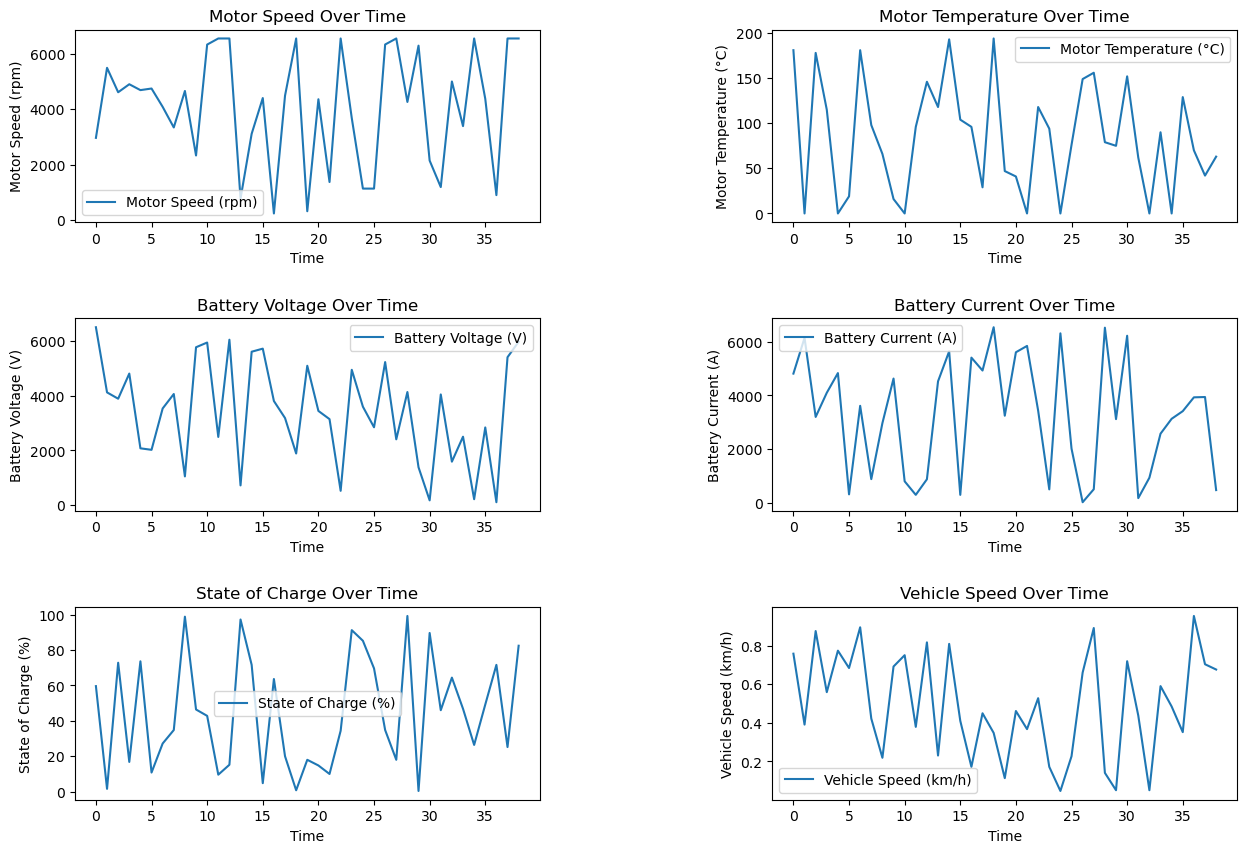

In [9]:
if __name__ == "__main__":
    plt.ion()  # Turn on interactive mode
    fig, axs = plt.subplots(3, 2, figsize=(15, 10))
    # Adjust the subplot layout parameters
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    while True:
        can_data = generate_raw_can_data()
        decoded_data = {}
        for can_id, data in can_data.items():
            try:
                decoded_data[can_id] = decode_can_data(can_id, data)
            except Exception as e:
                print(f"Error decoding CAN ID {can_id}: {e}")
                continue
            
        # Clear previous plots
        for ax in axs.flatten():
            ax.clear()

        if '0x100' in decoded_data:
            motor_speed.append(decoded_data['0x100']['MotorSpeed'])
            motor_temp.append(decoded_data['0x100']['MotorTemperature'])
            print(f"MotorSpeed: {motor_speed} rpm, MotorTemperature: {motor_temp} °C")  # Log values
        
        if '0x200' in decoded_data:
            battery_voltage.append(decoded_data['0x200']['BatteryVoltage'])
            battery_current.append(decoded_data['0x200']['BatteryCurrent'])
            soc.append(decoded_data['0x200']['StateOfCharge'])
        
        if '0x300' in decoded_data:
            vehicle_speed.append(decoded_data['0x300']['VehicleSpeed'])

        # Keep only the last 100 data points for real-time plotting
        motor_speed = motor_speed[-100:]
        motor_temp = motor_temp[-100:]
        battery_voltage = battery_voltage[-100:]
        battery_current = battery_current[-100:]
        soc = soc[-100:]
        vehicle_speed = vehicle_speed[-100:]
        
      
        # Plot motor speed
        sns.lineplot(ax=axs[0, 0], x=range(len(motor_speed)), y=motor_speed, label='Motor Speed (rpm)')
        axs[0, 0].set_title('Motor Speed Over Time')
        axs[0, 0].set_xlabel('Time')
        axs[0, 0].set_ylabel('Motor Speed (rpm)')

        # Plot motor temperature
        sns.lineplot(ax=axs[0, 1], x=range(len(motor_temp)), y=motor_temp, label='Motor Temperature (°C)')
        axs[0, 1].set_title('Motor Temperature Over Time')
        axs[0, 1].set_xlabel('Time')
        axs[0, 1].set_ylabel('Motor Temperature (°C)')

        # Plot battery voltage
        sns.lineplot(ax=axs[1, 0], x=range(len(battery_voltage)), y=battery_voltage, label='Battery Voltage (V)')
        axs[1, 0].set_title('Battery Voltage Over Time')
        axs[1, 0].set_xlabel('Time')
        axs[1, 0].set_ylabel('Battery Voltage (V)')

        # Plot battery current
        sns.lineplot(ax=axs[1, 1], x=range(len(battery_current)), y=battery_current, label='Battery Current (A)')
        axs[1, 1].set_title('Battery Current Over Time')
        axs[1, 1].set_xlabel('Time')
        axs[1, 1].set_ylabel('Battery Current (A)')

        # Plot state of charge
        sns.lineplot(ax=axs[2, 0], x=range(len(soc)), y=soc, label='State of Charge (%)')
        axs[2, 0].set_title('State of Charge Over Time')
        axs[2, 0].set_xlabel('Time')
        axs[2, 0].set_ylabel('State of Charge (%)')

        # Plot vehicle speed
        sns.lineplot(ax=axs[2, 1], x=range(len(vehicle_speed)), y=vehicle_speed, label='Vehicle Speed (km/h)')
        axs[2, 1].set_title('Vehicle Speed Over Time')
        axs[2, 1].set_xlabel('Time')
        axs[2, 1].set_ylabel('Vehicle Speed (km/h)')

        # Display plots
        display(fig)
        clear_output(wait=True)
        time.sleep(1)  # Update every second